In [1]:
#DECISION TREE CLASSIFIER

In [2]:
#First import libraries 

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt

In [3]:
my_data = pd.read_csv('data.csv')

my_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
my_data.info()

#The line below should display (569, 33)

my_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [5]:
#To remove the null values from the dataset, we use dropna(), and axis=1 means to remove them from columns.

my_data.dropna(axis=1, inplace=True)

In [6]:
#The id column is also unnecessary so we removed it from the dataset using my_data.drop() function.

my_dt= my_data.drop(['id'], axis = 1)

my_dt.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [24]:
#Every field in the dataset contributes equally to predicting the outcome diagnosis. The cancer diagnosis is mainly two, whether it’s benign or malignant. The below code displays the two diagnoses.
The_M = my_dt[my_data.diagnosis == "M"]

The_M.head()

The_B = my_dt[my_data.diagnosis == "B"]

The_B.head(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


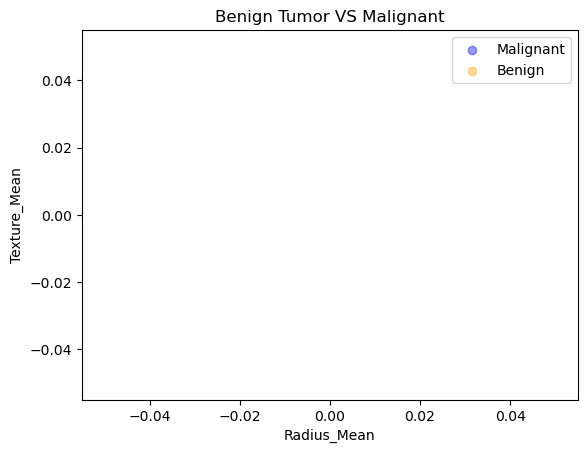

In [25]:
#The scatter plot is used here to display the texture mean and radius mean of Benign and Malignant.

#Plot both diagnosis Benign and Malignant 

plt.title("Benign Tumor VS Malignant")

plt.xlabel("Radius_Mean")

plt.ylabel("Texture_Mean")

plt.scatter(The_M.radius_mean, The_M.texture_mean, color = "blue", label = "Malignant", alpha = 0.4)

plt.scatter(The_B.radius_mean, The_B.texture_mean, color = "orange", label = "Benign", alpha = 0.4)

plt.legend()

plt.savefig("importance graph 4", facecolor='w', bbox_inches='tight',

            pad_inches=0.3, transparent=True)

plt.show()

In [27]:
#Now let’s implement the decision tree classifier using the Scikit-learn library.

my_data.diagnosis = [1 if i == "M" else 0 for i in my_data.diagnosis]

x_val = my_data.drop(["diagnosis"], axis = 1)

y_val = my_data.diagnosis.values

In [28]:
#The min-max normalization is used to smooth the data and transform large values into small scales to process the data easily and get high accuracy.
#Min_Max Normalization:

my_x= (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))
my_x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000924,1.974059e-08,1.139007e-08,1.347495e-07,1.098406e-06,1.299214e-10,3.046129e-10,3.293024e-10,1.614141e-10,2.654390e-10,...,2.784970e-08,1.901636e-08,2.025632e-07,2.215466e-06,1.779835e-10,7.303687e-10,7.811741e-10,2.912258e-10,5.048718e-10,1.304700e-10
1,0.000925,2.257164e-08,1.949918e-08,1.458323e-07,1.455031e-06,9.298595e-11,8.629236e-11,9.535613e-11,7.699816e-11,1.988324e-10,...,2.742175e-08,2.568800e-08,1.742526e-07,2.146336e-06,1.358468e-10,2.047578e-10,2.651098e-10,2.040994e-10,3.017599e-10,9.768243e-11
2,0.092504,2.160601e-08,2.331781e-08,1.426501e-07,1.320062e-06,1.202650e-10,1.754597e-10,2.166088e-10,1.403458e-10,2.270332e-10,...,2.586357e-08,2.801429e-08,1.673396e-07,1.875301e-06,1.584514e-10,4.658076e-10,4.942279e-10,2.666460e-10,3.964577e-10,9.610230e-11
3,0.092556,1.253127e-08,2.236315e-08,8.512922e-08,4.236709e-07,1.563665e-10,3.115260e-10,2.648903e-10,1.154369e-10,2.849711e-10,...,1.636087e-08,2.907868e-08,1.084909e-07,6.229422e-07,2.302154e-10,9.505986e-10,7.537414e-10,2.825570e-10,7.283936e-10,1.898344e-10
4,0.092567,2.226440e-08,1.573541e-08,1.482464e-07,1.423210e-06,1.100601e-10,1.457226e-10,2.172671e-10,1.144493e-10,1.985032e-10,...,2.473334e-08,1.829214e-08,1.670104e-07,1.728261e-06,1.507702e-10,2.249483e-10,4.389235e-10,1.783127e-10,2.594038e-10,8.425137e-11


In [32]:
#Now split the dataset into training and testing sets. We have used 40% for testing and 60% for training.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(my_x, y_val,test_size=0.4,random_state = 41)


In [30]:
#import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies

my_neighbors = np.arange(1,10)

train_acc =np.empty(len(my_neighbors))

test_acc = np.empty(len(my_neighbors))

for i,k in enumerate(my_neighbors):

    #Setup a knn classifier with k neighbors

    knn_model = KNeighborsClassifier(n_neighbors=k)  

    #Fit the model

    knn_model.fit(X_train, y_train)

    #Compute accuracy on the training set

    train_acc[i] = knn_model.score(X_train, y_train)

    #Compute accuracy on the test set

    test_acc[i] = knn_model.score(X_test, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'